GENDER: 0.0010787857395509806
AGE: 0.0014258358173795532
SMOKING: 0.07321143759247113
YELLOW_FINGERS: 0.11975483481261656
ANXIETY: 0.07688335464171751
PEER_PRESSURE: 0.08823293795700245
CHRONIC DISEASE: 0.09143248402593347
FATIGUE: 0.15031482523701373
ALLERGY: 0.1488407070696658
WHEEZING: 0.0600069943574073
ALCOHOL CONSUMING: 0.19418246409612186
COUGHING: 0.10580073616078761
SHORTNESS OF BREATH: 0.04454604524273137
SWALLOWING DIFFICULTY: 0.09966123695968128
CHEST PAIN: 0.027631188504959357
Intercept: -1.2123157998478589


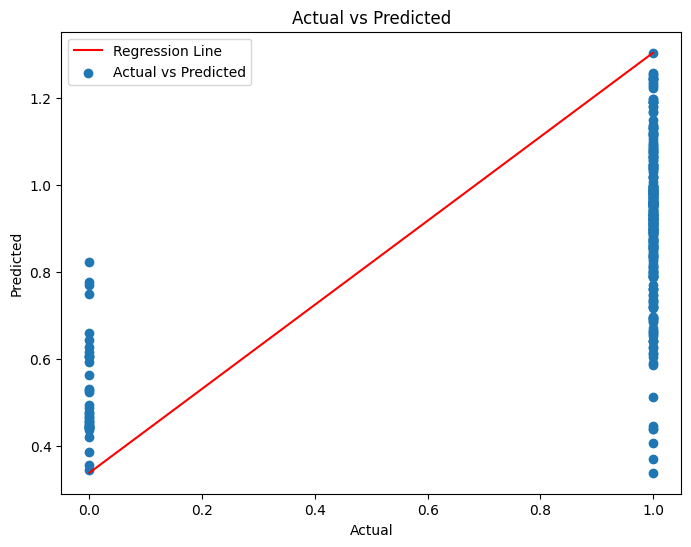

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset
data = pd.read_csv('datasets/cancer.csv')

# Create DataFrame
df = pd.DataFrame(data)
# Uklonite razmake na kraju imena obeležja u skupu podataka
df.columns = df.columns.str.strip()

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features (X) and target variable (y)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Instantiate the model
regression = LinearRegression()

# Fit the model
regression.fit(X, y)

# Coefficients
coefficients = regression.coef_ #w0
intercept = regression.intercept_ #w1

# Print coefficients
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Print intercept
print(f'Intercept: {intercept}')

# Predict
y_pred = regression.predict(X)

# Plot
plt.figure(figsize=(8, 6))

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], '-r', label='Regression Line')

# Scatter plot
plt.scatter(y, y_pred, label='Actual vs Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Adding legend
plt.legend()

plt.show()



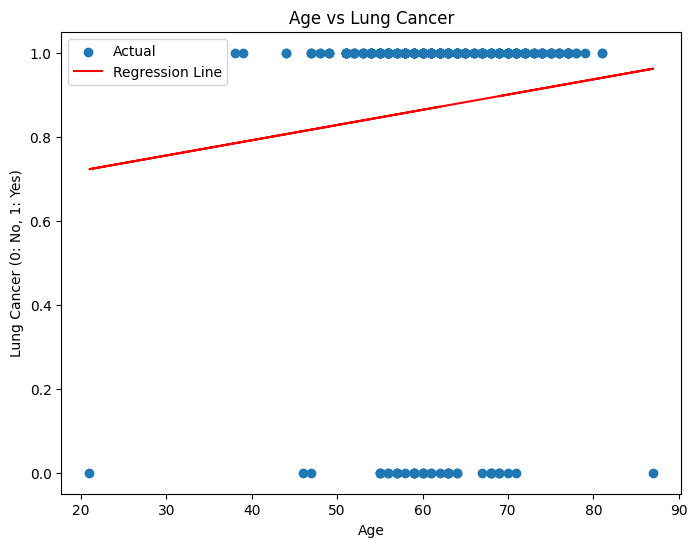

In [14]:
#predikcija za samo jednu promenljivu age
# Koristimo samo jednu kolonu za predikciju
X = df[['AGE']]

# Ponovo instanciramo model
regression = LinearRegression()

# Ponovo fitujemo model
regression.fit(X, y)

# Predviđanja
y_pred = regression.predict(X)

# Plot
plt.figure(figsize=(8, 6))#Ova postavka označava da će figura biti široka 8 inča i visoka 6 inča.

# Scatter plot
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Lung Cancer (0: No, 1: Yes)')
plt.title('Age vs Lung Cancer')

plt.legend()
plt.show()


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


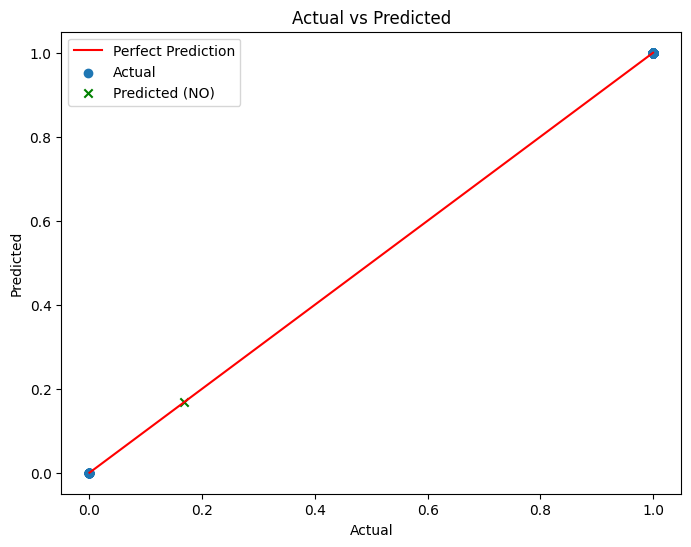

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the dataset
data = pd.read_csv('datasets/cancer.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features (X) and target variable (y)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Instantiate the model
regression = LinearRegression()

# Fit the model
regression.fit(X, y)

# Define new instance
nova_vrednost = {
    'GENDER': 'M',
    'AGE': 69,
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 1,
    'PEER_PRESSURE': 1,
    'CHRONIC DISEASE': 1,
    'FATIGUE': 1,
    'ALLERGY': 1,
    'WHEEZING': 1,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 1,
    'SHORTNESS OF BREATH': 1,
    'SWALLOWING DIFFICULTY': 1,
    'CHEST PAIN': 1,
    'LUNG_CANCER': 'YES'  # Dummy value, will be ignored
}

# Uklanjanje razmaka iz imena kolona
df.columns = df.columns.str.strip()
# Kodiranje kategoričkih promenljivih u novoj vrednosti
nova_vrednost_encoded = nova_vrednost.copy()  # Pravimo kopiju da ne bismo menjali originalnu vrednost
for column in nova_vrednost_encoded:
    if column in label_encoders:  # Proveravamo da li je kolona kategorička
        nova_vrednost_encoded[column] = label_encoders[column].transform([nova_vrednost_encoded[column]])[0]

# Pretvaranje u numpy array
nova_vrednost_array = np.array([nova_vrednost_encoded[key] for key in df.drop(columns=['LUNG_CANCER']).columns])

# Predikcija
predikcija = regression.predict(nova_vrednost_array.reshape(1, -1))

# Interpretacija predikcije
if predikcija[0] > 0.5:
    predikcija_label = 'YES'
else:
    predikcija_label = 'NO'

# Plot
plt.figure(figsize=(8, 6))
plt.plot([min(y), max(y)], [min(y), max(y)], '-r', label='Perfect Prediction')
plt.scatter(y, y, label='Actual')
plt.scatter(predikcija, predikcija, color='green', marker='x', label=f'Predicted ({predikcija_label})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



In [10]:
# Imena obeležja u skupu podataka
print("Imena obeležja u skupu podataka:")
print(df.columns)

# Imena obeležja u modelu
print("Imena obeležja u modelu:")
print(regression.coef_)


Imena obeležja u skupu podataka:
Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
Imena obeležja u modelu:
[0.00107879 0.00142584 0.07321144 0.11975483 0.07688335 0.08823294
 0.09143248 0.15031483 0.14884071 0.06000699 0.19418246 0.10580074
 0.04454605 0.09966124 0.02763119]


In [22]:
print(label_encoders.keys())


dict_keys(['GENDER', 'LUNG_CANCER'])
